https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn import linear_model, neighbors, datasets, preprocessing, metrics, svm
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
# Utilizaremos solo imagenes de 7 personas con mas de 70 imagenes disponibles.
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=1, color=False, download_if_missing=True)

# Inspeccion de los tamaños
n_samples, h, w = lfw_people.images.shape

# Datos sin divir en subconjuntos
X = lfw_people.images

# Etiquetas y clases
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("h, w: (%d, %d)" % (h, w))
print("n_samples: %d" % n_samples)
print("n_classes: %d" % n_classes)

Total dataset size:
h, w: (125, 94)
n_samples: 1288
n_classes: 7


In [3]:
print(target_names)
print(X.shape)
print(y.shape)
print(y[0])
print(X[0])

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
(1288, 125, 94)
(1288,)
5
[[0.99477124 0.99477124 0.9986928  ... 0.21830066 0.20130719 0.20653595]
 [0.99607843 0.99607843 0.99477124 ... 0.22222222 0.20261438 0.20653595]
 [0.9986928  0.9973857  0.99346405 ... 0.2248366  0.20522876 0.20261438]
 ...
 [0.3137255  0.29542485 0.2509804  ... 0.39477125 0.3777778  0.36993468]
 [0.29803923 0.2875817  0.2522876  ... 0.3869281  0.38300657 0.38300657]
 [0.2784314  0.275817   0.25751635 ... 0.38169935 0.38039216 0.38039216]]


In [4]:
#Funciones para graficar
def plot_gallery(images, number, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(number):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y, target_names):
    return "%s" % (target_names[y])

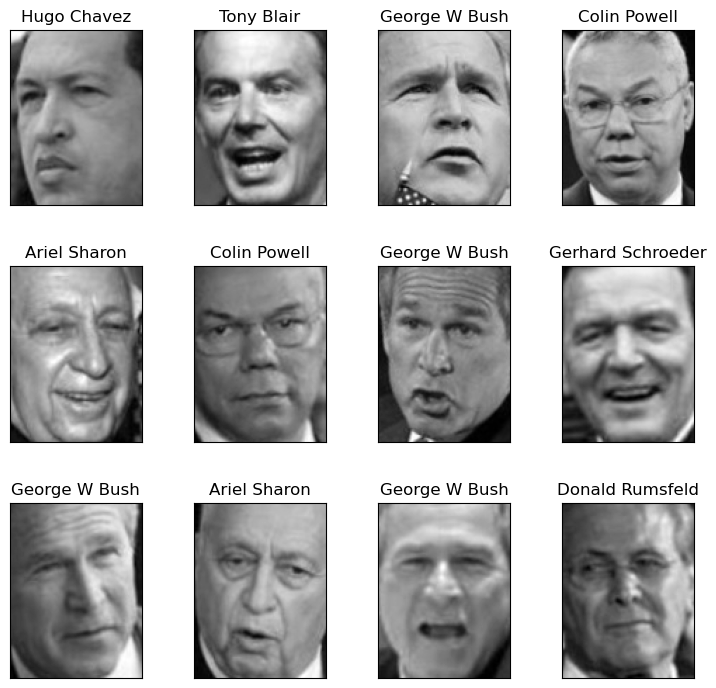

In [5]:
titles = [title(y[i], target_names) for i in range(20)]
plot_gallery(X, 12 , titles, h, w)

In [6]:
print(np.max(X))
print(np.min(X))

1.0
0.0


In [7]:
# 1) Aplicar el algoritmo PCA a los datos. Pero antes, las imágenes deben convertirse a vectores 1D.
X_vector = X.reshape(n_samples, h * w)
print(X_vector.shape)  # Para ver que las imágenes están en vectores 1D.

# El número de componentes principales debe seleccionarse de manera que el porcentaje de varianza explicada sea mayor al 80%.
pca = PCA(n_components=45)
X_pca = pca.fit_transform(X_vector)
print(np.sum(pca.explained_variance_ratio_))

(1288, 11750)
0.81104296


In [41]:
# 2) Separar el dataset en conjuntos de entrenamiento y prueba utilizando el comando train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=80)

C:\Users\Usuario\anaconda3.1\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Exactitud en los datos: 0.82


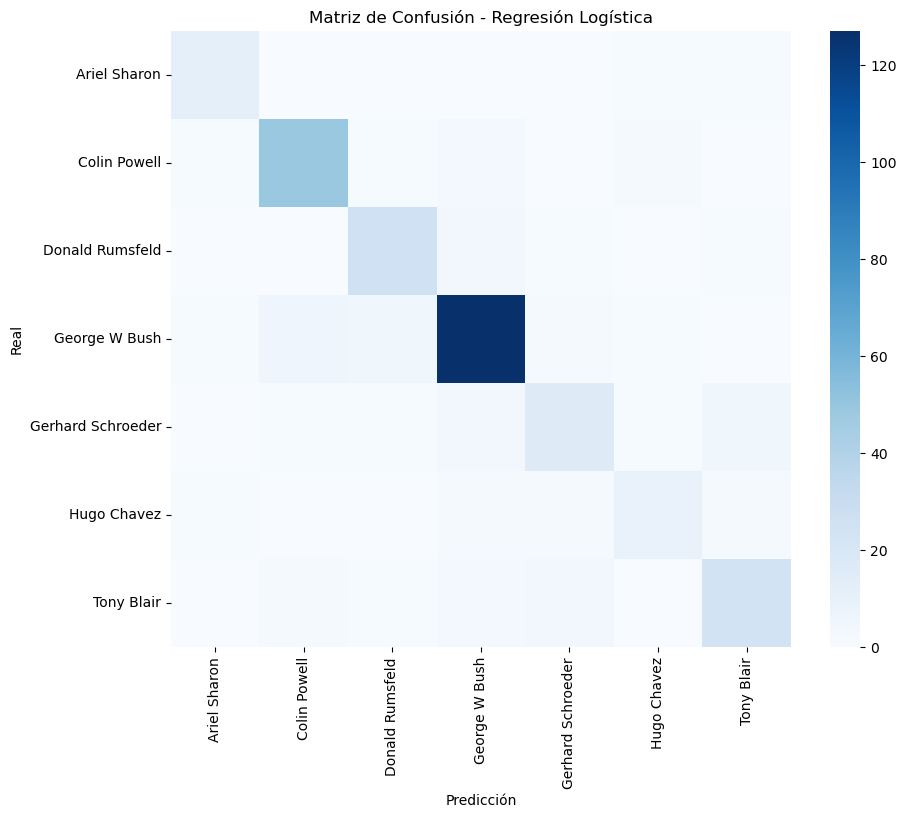

Matriz de confusión:
 [[ 12   0   0   0   0   1   1]
 [  1  49   1   3   0   2   0]
 [  0   0  26   4   1   0   1]
 [  1   6   5 127   2   1   0]
 [  0   1   1   4  16   1   5]
 [  1   0   0   2   2   9   2]
 [  0   2   1   3   4   0  24]]


In [43]:
# 3) Determinar un modelo de clasificación basado en regresión logística, utilizando el conjunto de entrenamiento.
rl = LogisticRegression()
rl.fit(X_train, y_train)

# Evalúe el desempeño del modelo sobre el conjunto de prueba, determinando la precisión (accuracy) y la matriz de confusión.
y_pred = rl.predict(X_test)
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusion, cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()
print("Matriz de confusión:\n", matriz_confusion)

Exactitud KNN en los datos: 0.55


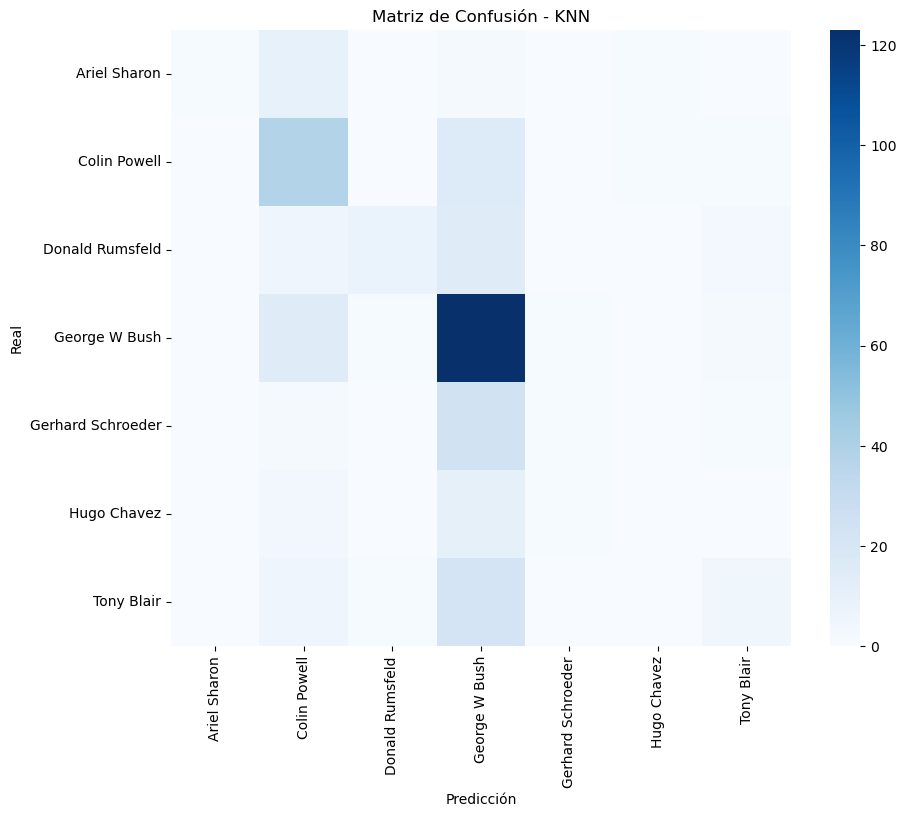

Matriz de confusión:
 [[  1  10   0   2   0   1   0]
 [  0  38   0  16   0   1   1]
 [  0   6   8  15   0   0   3]
 [  0  15   1 123   1   0   2]
 [  0   2   0  24   1   0   1]
 [  0   4   0  11   1   0   0]
 [  0   6   1  22   0   0   5]]


In [45]:
# 4) Determinar un modelo de clasificación basado en KNN, utilizando el conjunto de entrenamiento.
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

# Evalúe el desempeño del modelo sobre el conjunto de prueba, determinando la precisión (accuracy) y la matriz de confusión.
accuracy_knn = knn.score(X_test, y_test)
print(f"Exactitud KNN en los datos: {accuracy_knn:.2f}")
y_pred_knn = knn.predict(X_test)
matriz_confusion_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusion_knn, cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - KNN')
plt.show()
print("Matriz de confusión:\n", matriz_confusion_knn)

Exactitud SVM en los datos: 0.81


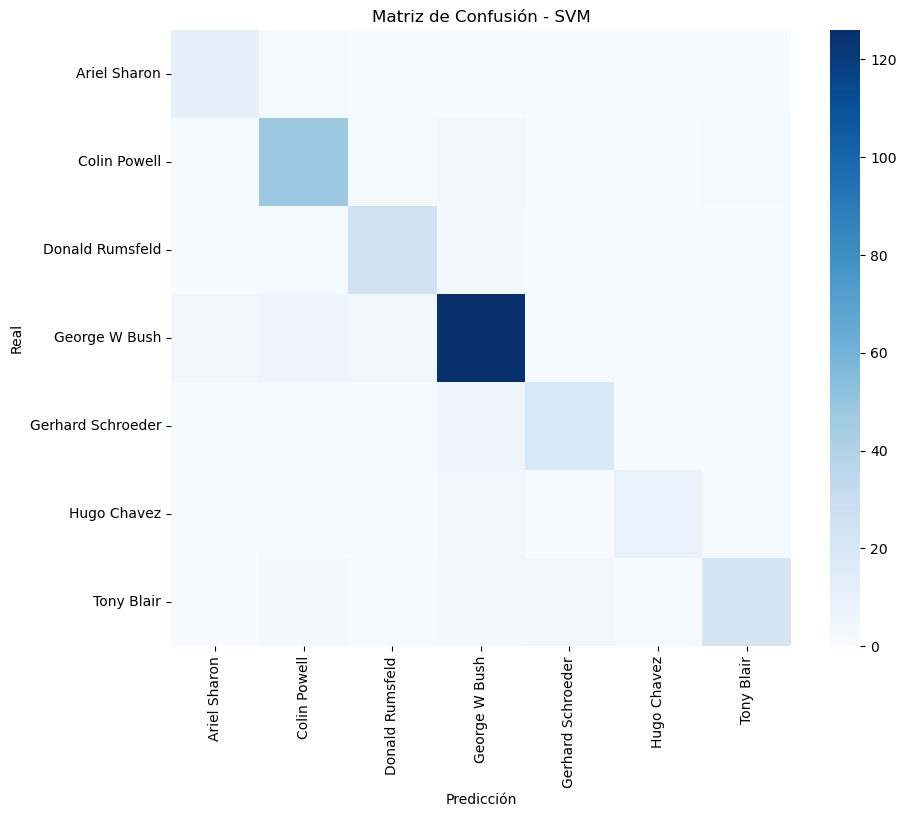

Matriz de confusión:
 [[ 11   2   0   1   0   0   0]
 [  0  48   2   4   0   0   2]
 [  0   1  26   3   1   0   1]
 [  4   6   4 126   1   0   1]
 [  0   1   1   6  19   0   1]
 [  0   1   0   4   0   9   2]
 [  0   3   1   3   4   1  22]]


In [47]:
# 5) Determinar un modelo de clasificación basado en SVM, utilizando el conjunto de entrenamiento.
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Evalúe el desempeño del modelo sobre el conjunto de prueba, determinando la precisión (accuracy) y la matriz de confusión. 
accuracy_svm = svm.score(X_test, y_test)
print(f"Exactitud SVM en los datos: {accuracy_svm:.2f}")
y_pred_svm = svm.predict(X_test)
matriz_confusion_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusion_svm, cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - SVM')
plt.show()
print("Matriz de confusión:\n", matriz_confusion_svm)

In [17]:
# COMENTARIOS

# A diferencia del ejercicio anterior, en este no seguí un proceso "lineal" o "secuencial" de selección de valores y parámetros, y simplemente fui
# cambiando de manera aleatoria los siguientes valores: cantidad de componentes del algoritmo de PCA; porcentaje de datos de prueba y random_state del
#comando train_test_split; Y cantidad de neighbors en el modelo de KNN.

# DATOS A CONSIDERAR

# Gran parte de la eficacia de los modelos se debe a la desproporcionada cantidad de imagenes de George W. Bush en el dataset, como se puede comprobar
# en la matriz de confusión.

# Durante el inicio, al ir cambiando los distintos valores, mientras los modelos de KNN Y SVM me daban precisiones del 70%, el de RL oscilaba entre
# valores del 50%.

# Luego, al ir cambiando el valor de random_state, sucedió que el algoritmo de RL empezó a tener resultados similares al de SVM, y el KNN fue adquiriendo
# menos precisión, quedando en los valores actuales.

# Conclusión: en mi caso particular, el que permaneció con altas precisiones constantes fue el modelo de SVM.